In [5]:
import pandas as pd 
import numpy as np
import cleaning_functions as cf
import encoding_functions as ef

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/clean_merged_df.csv")

df.head()

,Unnamed: 0,Release Type,In Custody,Days in Court,Offence Location,Date,Proceeding Type,Court,Offence Number,Offence,...,Surrey,Vancouver,Victoria,Offence_0,Offence_1,Offence_2,Offence_3,Offence_4,Offence_5,Offence_6
0,0,6.0,Y,100,Mission BC,2023-03-22,JIR,1,811,Breach of Recognizance,...,0,0,0,0,0,0,0,0,0,1
1,1,6.0,N,145,Abbotsford BC,2023-03-22,ARB,1,733.1 1,Breach of Probation,...,0,0,0,0,0,0,0,0,1,0
2,2,6.0,N,130,Abbotsford BC,2023-03-22,ARB,1,266,Assault,...,0,0,0,0,0,0,0,0,1,1
3,3,2.0,Y,104,Mission BC,2023-03-22,JIR,1,266,Assault,...,0,0,0,0,0,0,0,0,1,1
4,4,3.0,Y,391,Mission BC,2023-03-22,JIR,1,5 2,PPT,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# clean as needed
df = ef.encode_incustody(df)

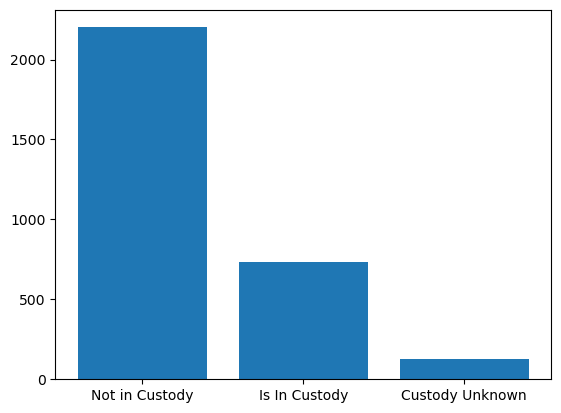

In [8]:
# create a list of column names to plot
cols_to_plot = ['Not in Custody', 'Is In Custody', 'Custody Unknown']

# create a list of counts for each column
counts = [sum(df[col]) for col in cols_to_plot]

# plot the counts
plt.bar(cols_to_plot, counts)
plt.show()

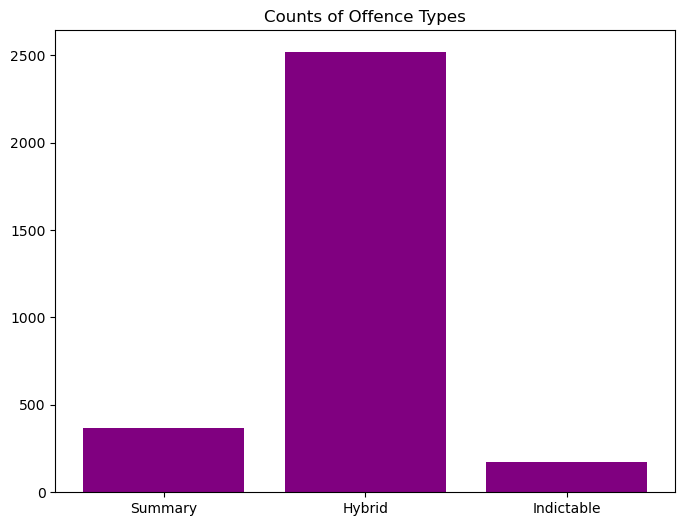

In [9]:
# create a dictionary to map the election values to offense types
election_map = {0: 'Summary', 1: 'Hybrid', 3: 'Indictable'}

# get the counts of each offense type
counts = df['Election'].map(election_map).value_counts().tolist()

# swap the positions of bars 1 and 2
counts[0], counts[1] = counts[1], counts[0]

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Summary', 'Hybrid', 'Indictable'], counts, color='purple', width=0.8)

# add title, remove gridlines and plot
ax.set_title('Counts of Offence Types')
ax.grid(False)
plt.show()

Offences by max jail time

In [10]:
df['Maximum (Indictable)(Years)'].value_counts()

2     1094
5      725
10     553
1      300
14     208
25     176
7        4
Name: Maximum (Indictable)(Years), dtype: int64

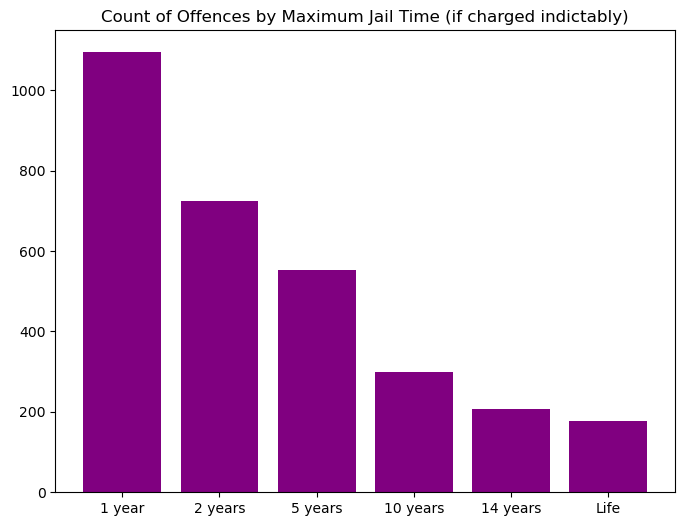

In [12]:
x = [1, 2, 3, 4, 5, 6]
y = [1094, 725, 553, 300, 208, 176]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, y, color = 'purple')

# add labels, title, remove gridlines
ax.set_xticks(x)
ax.set_xticklabels(['1 year', '2 years', '5 years', '10 years', '14 years', 'Life'])
ax.grid(False)
ax.set_title('Count of Offences by Maximum Jail Time (if charged indictably)')

# display plot
plt.show()

Length of time in court system

In [13]:
stats = df['Days in Court'].describe()
stats

count    3060.000000
mean      199.736928
std       275.469069
min         0.000000
25%        44.000000
50%       120.000000
75%       262.000000
max      8646.000000
Name: Days in Court, dtype: float64

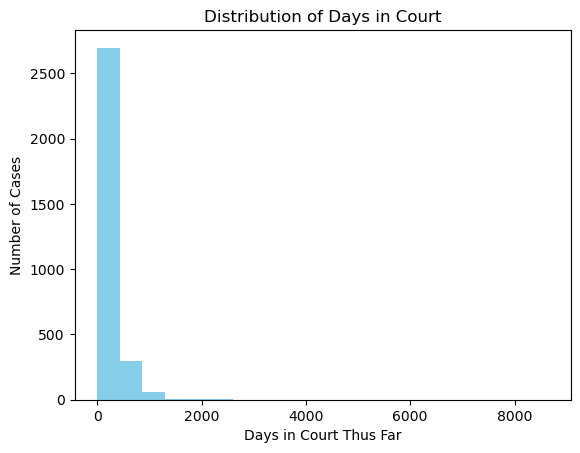

In [14]:
# create histogram
plt.hist(df['Days in Court'], bins=20, color='skyblue')

# add labels and title
plt.xlabel('Days in Court Thus Far')
plt.ylabel('Number of Cases')
plt.title('Distribution of Days in Court')

# display plot
plt.show()

In [15]:
df.columns

Index(['Unnamed: 0', 'Release Type', 'Days in Court', 'Offence Location',
       'Date', 'Proceeding Type', 'Court', 'Offence Number', 'Offence',
       'Election', 'Discharge Available', 'SS Available', 'CSO Available',
       'Maximum (Summary)(Years)', 'Maximum (Indictable)(Years)', 'Has Lawyer',
       'Abbotsford', 'New Westminster', 'North Vancouver', 'Port Coquitlam',
       'Richmond', 'Surrey', 'Vancouver', 'Victoria', 'Offence_0', 'Offence_1',
       'Offence_2', 'Offence_3', 'Offence_4', 'Offence_5', 'Offence_6',
       'Not in Custody', 'Custody Unknown', 'Is In Custody'],
      dtype='object')

percentage of people with lawyers in each courthouse and overall

In [16]:
df['Has Lawyer'].value_counts()

1    1890
0    1170
Name: Has Lawyer, dtype: int64

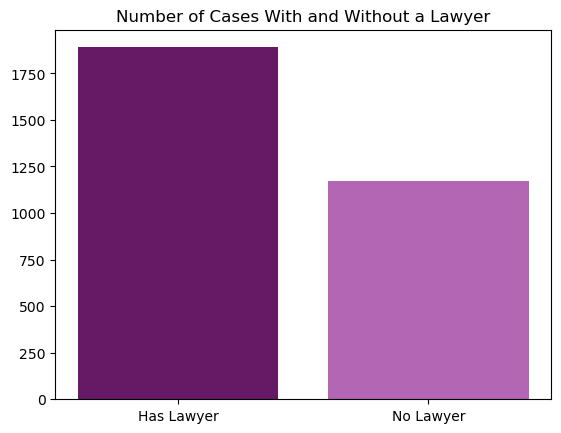

In [17]:
# create figure and axis objects
fig, ax = plt.subplots()

# count values in column
counts = df['Has Lawyer'].value_counts()

# create bar plot
ax.bar(counts.index.astype(str), counts, color=[(0.4, 0.1, 0.4), (0.7, 0.4, 0.7)])

# set title
ax.set_title('Number of Cases With and Without a Lawyer')

# set xticks and xticklabels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Has Lawyer', 'No Lawyer'])

# display plot
plt.show()

In [20]:
# revert to unencoded df to get more info
df2 = pd.read_csv("../data/pre-encoded_df.csv")

# re-encode lawyer column
import cleaning_functions as cf
df2 = cf.clean_lawyers(df2)

# partly clean Courts column
df2['Court Location'] = df2['Court Location'].str.strip()

# group the DataFrame by court and count number of cases with and without a lawyer
counts = df2.groupby('Court Location')['Has Lawyer'].value_counts().unstack(fill_value=0)
counts

c:\Users\emily\OneDrive\Desktop\Data Science Bootcamp\Final Project\src\cleaning_functions.py:66: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Lawyer'] = df['Lawyer'].str.replace(r'[^\w\s]','').str.replace(r'\b\w{1,2}\b','')


Has Lawyer,0,1
Court Location,,
Abbotsford,160,283
New Westminster,141,44
North Vancouver,78,67
Port Coquitlam,140,308
Richmond,84,40
Surrey,306,796
Vancouver,161,252
Victoria,100,100


In [21]:
# calculate the total number of cases for each court
total_counts = counts.sum(axis=1)

# calculate the percentage of cases with a lawyer for each court
percentages = counts[1] / total_counts * 100

percentages

Court Location
Abbotsford         63.882619
New Westminster    23.783784
North Vancouver    46.206897
Port Coquitlam     68.750000
Richmond           32.258065
Surrey             72.232305
Vancouver          61.016949
Victoria           50.000000
dtype: float64

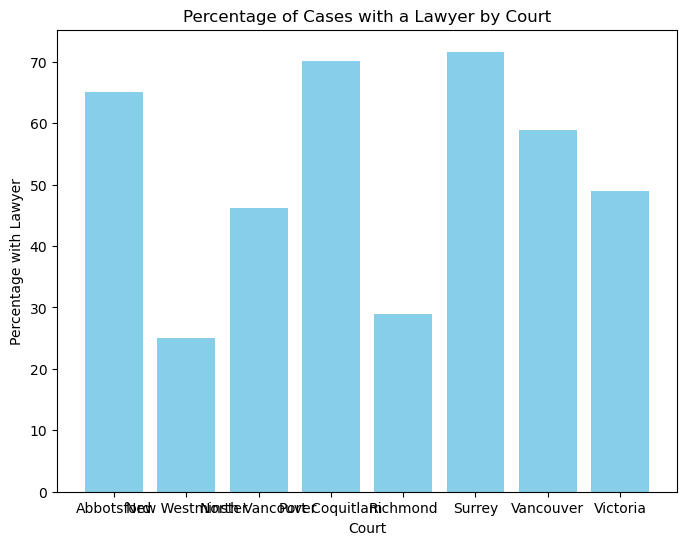

In [27]:
# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(percentages.index, percentages, color='skyblue')

# add labels and title
ax.set_xlabel('Court')
ax.set_ylabel('Percentage with Lawyer')
ax.set_title('Percentage of Cases with a Lawyer by Court')

# display plot
plt.show()